#Trabalho de Otimização
Carolina Frank Abdu e Rafaella Lenzi Romano

##Bibliotecas



In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



#Função 1:
$$
\min f(x) = \sum_{i=1}^{6} \left( 100 (x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right)
\quad \text{sujeito a} \quad x \in \mathbb{R}^7
$$

Podemos notar que as parcelas do nosso somatório são valores não negativos, ou seja, o menor valor possível nessa primeira análise seria o zero. Além disso, como queremos minimizar, podemos analisar cada parcela separadamente. Como há dependência de valores, vamos analisar a parcela: $$100 (x_{2} - x_1^2)^2 + (1 - x_1)^2 $$ e depois prosseguir com as próximas.  

Gráfico : https://www.geogebra.org/3d/qjszp48r

##Gradiente
Vamos encontrar os pontos críticos da função $$100 (x_{2} - x_1^2)^2 + (1 - x_1)^2 $$


   $$
   \frac{\partial f}{\partial x_1} = -400 x_1 (x_2 - x_1^2) - 2 (1 - x_1)
   $$


   $$
   \frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2)
   $$

Pelo segundo gradiente temos que $$x_2=x_1^2,$$ substituindo no primeiro gradiente, podemos notar o ponto crítico (1, 1).

####Observação:
Como no ponto crítico encontrado $x_1=x_2$, podemos analisar apenas essa primeira parcela já que as outras serão iguais também.

##Hessiana
No ponto (1,1), a Hessiana H é:

\begin{bmatrix}
1200x_1^2 - 400x_2 + 2 & -400x_1\\
-400x_1 & 200
\end{bmatrix}
=
\begin{bmatrix}
802 & -400\\
-400 & 200
\end{bmatrix}

Como a matriz é definida positiva, podemos afirmar que (1,1) é minimizador local estrito.

In [3]:
def func1(x):
  x = np.array(x)
  f1 = 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
  return f1

def grad_1(x):
  grad = np.zeros(2)
  grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
  grad[1] = 200 * (x[1] - x[0]**2)
  return grad

def hess_1(x):
  hess = np.zeros((2,2))
  hess[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
  hess[0, 1] = hess[1, 0] = -400 * x[0]
  hess[1, 1] = 200
  return hess

def funcao_1(x):
  x = np.array(x)
  f= 0
  for i in range(0, 6):
    f += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
  return f

def gradiente_1(x):
  grad = np.zeros(7)
  grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
  for i in range(1, 6):
    grad[i] = -400 * x[i] * (x[i+1] - x[i] )+ 2*(x[i]-1) + 200 * (x[i] - x[i-1]**2)
  grad[6] = 200 * (x[6] - x[5]**2)
  return grad

def hesssiana_1(x):
  hess = np.zeros((7, 7))

  # Preencher a matriz Hessiana
  hess[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
  hess[0, 1] = -400 * x[0]

  for i in range(1, 6):
      hess[i, i-1] = -400 * x[i-1]
      hess[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 202
      hess[i, i+1] = -400 * x[i]

  hess[6, 5] = -400 * x[5]
  hess[6, 6] = 200

  return hess

def definida_positiva(x):
  A = np.array(hess_1(x))
  autovalores = np.linalg.eigvals(A)
  if np.all(autovalores > 0):
    return True
  else:
    return False

print(func1([1,1]))
print(grad_1([1,1]))
print(hess_1([1,1]))
print(funcao_1([1,1,1,1,1,1,1]))
print(hesssiana_1([1,1,1,1,1,1,1]))
print(gradiente_1([1,1,1,1,1,1,1]))
print(gradiente_1([0.82940915, 0.78198975, 0.80022798, 0.87047686, 0.90832119,
       0.96949339, 0.98887151]))



0
[0. 0.]
[[ 802. -400.]
 [-400.  200.]]
0
[[ 802. -400.    0.    0.    0.    0.    0.]
 [-400. 1002. -400.    0.    0.    0.    0.]
 [   0. -400. 1002. -400.    0.    0.    0.]
 [   0.    0. -400. 1002. -400.    0.    0.]
 [   0.    0.    0. -400. 1002. -400.    0.]
 [   0.    0.    0.    0. -400. 1002. -400.]
 [   0.    0.    0.    0.    0. -400.  200.]]
[0. 0. 0. 0. 0. 0. 0.]
[-31.5502595   12.67317831  14.8584104   32.58631631   7.70928542
  21.31340424   9.79081535]


#Função 2:
$$
\min f(x) = \sum_{i=1}^{100} \left( x_i^4 - 16 x_i^2 + 5 x_i \right)
\quad \text{sujeito a} \quad x \in \mathbb{R}^{100}
$$

Podemos minimizar cada uma das parcelas, pois elas são independentes. Além disso, terão o mesmo valor. Assim, o problema se reduz a encontrar o mínimo da função:
$$f(x) = x^4 -16x^2+5x$$


##Gradiente

   $$
   \frac{\partial f}{\partial x_i} = 4 x^3 -32x +5
   $$

Gráfico :
https://www.geogebra.org/graphing/kmhujh39

Pontos críticos encontrados:
x = -2,903; x = 2,747; x= 0,157

In [4]:
def func2(x):
  x = np.array(x)
  f2 = x[0]**4 - 16 * x[0]**2 + 5 * x[0]
  return f2

def grad_2(x):
  grad = np.zeros(1)
  grad[0] = 4 * x[0]**3 - 32 * x[0] + 5
  return grad

def hess_2(x):
  hess = np.zeros((1, 1))
  hess[0, 0] += 12 * x[0]**2 - 32
  return hess

def definida_positiva(x):
  A = np.array(hess_2(x))
  autovalores = np.linalg.eigvals(A)
  if np.all(autovalores > 0):
    return True
  else:
    return False

## Fazendo no R100:
def funcao_2(x):
  x = np.array(x)
  f2 = 0
  for i in range(0, 100):
    f2 += x[i]**4 - 16 * x[i]**2 + 5 * x[i]
  return f2

def gradiente_2(x):
  grad = np.zeros(100)
  for i in range(0, 100):
    grad[i] = 4 * x[i]**3 - 32 * x[i] + 5
  return grad

def hessiana_2(x):
  h = np.zeros((100, 100))
  for i in range(0, 100):
    h[i, i] += 12 * x[i]**2 - 32
  return h

def p():
  print(func2([0.157]))
  print(grad_2([0.157]))
  print(hess_2([0.157]))
  print(definida_positiva([0.157]))

  print(func2([2.747]))
  print(grad_2([2.747]))
  print(hess_2([2.747]))
  print(definida_positiva([2.747]))

  print(func2([-2.903]))
  print(grad_2([-2.903]))
  print(hess_2([-2.903]))
  print(definida_positiva([-2.903]))

#Função 3:
$$
\min f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2
\quad \text{sujeito a} \quad x \in \mathbb{R}^2
$$

Podemos observar que o mínimo será zero, já que temos a soma de duas funções não negativas. Um estudo dos candidatos ao mínimo, usando essa simplificação pode ser observado no gráfico a seguir: https://www.geogebra.org/calculator/eh33nvhk

##Gradiente
$$
   \frac{\partial f}{\partial x_1} = 4x_1(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7)
   $$


   $$
   \frac{\partial f}{\partial x_2} = 2 (x_1^2 + x_2 - 11) + 4x_2(x_1 + x_2^2 - 7)
   $$

  Gráfico: https://www.geogebra.org/3d/g9wx3y3d
  

In [5]:
def func3(x):
  f3 = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
  return f3

def grad_3(x):
  grad = np.zeros(2)
  grad[0] = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
  grad[1] = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
  return grad

def hess_3(x):
  hess = np.zeros((2, 2))
  hess[0, 0] = 12 * x[0]**2 + 4 * x[1] - 42
  hess[0, 1] = hess[1, 0] = 4 * (x[0] + x[1])
  hess[1, 1] = 12 * x[1]**2 + 4 * x[0] - 26
  return hess


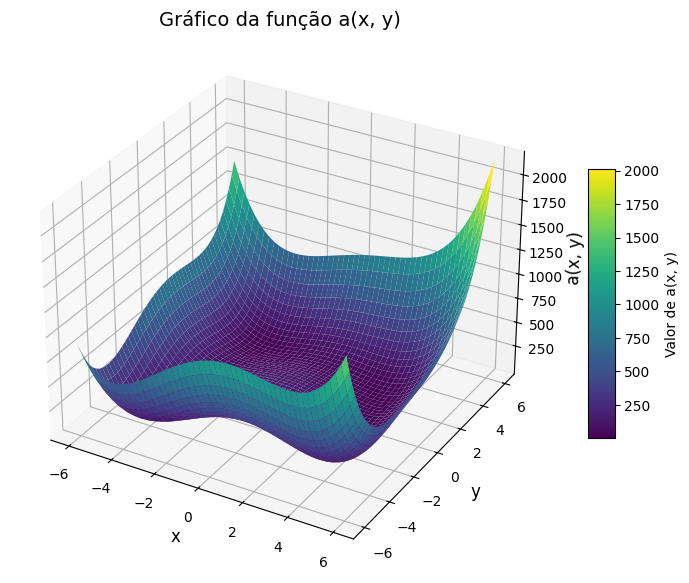

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a função
def a(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gerando a grade para plotagem
x = np.linspace(-6, 6, 400)  # Valores de x
y = np.linspace(-6, 6, 400)  # Valores de y
X, Y = np.meshgrid(x, y)
Z = a(X, Y)

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Configurações do gráfico
ax.set_title('Gráfico da função a(x, y)', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('a(x, y)', fontsize=12)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Valor de a(x, y)')

# Exibindo o gráfico
plt.show()


#Busca de Armijo

In [38]:
def armijo(x, gama, d, mi):
  k = 1
  d = np.array(d) #direção de descida
  t= 0.5
  while f(x+t*d) > f(x) + mi*t*(np.transpose(gradiente(x)))@d:
    t = gama*t
    k = k+1
  return t, k




#Método Gradiente

In [27]:
def metodo_gradiente(x, gama, mi, epsilon, maxiter):
  x=np.array(x)
  k=0
  i = 0   #Número de iterações
  t= 0.5
  #while gradiente(x) != 0 :   #provavel ajuste aqui para limitar
  while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter :
    d = -gradiente(x)
    t, kn = armijo(x, gama, d, mi, t)
    x = x + t*d
    k = k + kn
    i = i+1
  return x, k, i




In [39]:
def metodo_gradiente(x, gama, mi, epsilon, maxiter):
    x = np.array(x)
    k = 0  # Contador de iterações da busca de linha
    i = 0  # Número de iterações do método do gradiente
    t = 0.5  # Tamanho de passo inicial
    beta = 1e-8  # Termo de regularização para evitar problemas numéricos

    while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter:
        grad = gradiente(x)

        # Regularização do gradiente
        grad_norm = np.linalg.norm(grad)
        if grad_norm < beta:
            print(f"Gradiente pequeno demais na iteração {i}, adicionando perturbação.")
            grad += beta * np.random.rand(*grad.shape)

        # Direção de descida
        d = -grad / (grad_norm + beta)  # Evita divisões por zero

        # Busca de linha usando Armijo
        try:
            t, kn = armijo(x, gama, d, mi)
        except Exception as e:
            print(f"Erro na busca de linha: {e}. Usando passo fixo.")
            t = 0.1  # Fallback para um passo fixo

        # Atualização do ponto
        x = x + t * d
        k += kn
        i += 1

        # Logging para depuração
        print(f"Iteração {i}: x = {x}, grad_norm = {grad_norm}, passo t = {t}")

    return x, k, i


##Método Newton


In [43]:
from re import M
def newton(x,gama, mi,epsilon, maxiter):
  k=0
  i=0  #Número de iterações
  t = 0.5
  while np.linalg.norm(gradiente(x))> epsilon and i< maxiter :
    d = -(np.linalg.inv(hessiana(x)))@gradiente(x)
    t, kn = armijo(x, gama, d, mi)
    x = x + t*d
    k = k+kn
    i = i+1
  return x, k, i



In [49]:
import numpy as np

def newton(x, gama, mi, epsilon, maxiter, lambda_=1e-6):
    x = np.array(x, dtype=float)  # Certifique-se de que x seja um array NumPy
    k = 0  # Contador de iterações da busca de linha
    i = 0  # Número de iterações do método de Newton
    t = 0.5  # Tamanho de passo inicial

    while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter:
        grad = gradiente(x)
        hess = hessiana(x)

        # Regularização da Hessiana
        hess_reg = hess + lambda_ * np.eye(len(hess))

        try:
            # Direção de Newton
            d = -np.linalg.inv(hess_reg) @ grad
        except np.linalg.LinAlgError:
            # Fallback para descida gradiente
            print(f"Hessiana singular na iteração {i}, usando descida gradiente.")
            d = -grad

        # Busca de linha robusta
        try:
            t, kn = armijo(x, gama, d, mi)
            if t < 1e-6:  # Fallback para passo fixo
                print(f"Tamanho de passo muito pequeno ({t}), ajustando para passo fixo.")
                t = 0.1
        except Exception as e:
            print(f"Erro na busca de linha: {e}. Usando passo fixo.")
            t = 0.1  # Fallback para um passo fixo

        # Atualização do ponto
        x = x + t * d
        k += kn
        i += 1

        # Logging para depuração
        print(f"Iteração {i}: x = {x}, grad_norm = {np.linalg.norm(grad)}, passo t = {t}")

    return x, k, i


##Método Quase-Newton

In [42]:
def DFS(x0, x1,H): #para funções mais simples converge mais rápido
  x0 = np.array(x0) #x antigo
  x1 = np.array(x1) #x atual
  p = x1-x0
  q = gradiente(x1)-gradiente(x0)
  if np.linalg.norm(p) != 0 and np.linalg.norm(q) != 0:
    H = H + (p@np.transpose(p))/(np.transpose(p)@q) - (H@q@np.transpose(q)@H)/(np.transpose(q)@H@q)
  else:
    H = H
  return H

def BFGS__(x0, x1,H):
  x0 = np.array(x0) #x antigo
  x1 = np.array(x1) #x atual
  p = x1-x0
  q = gradiente(x1)-gradiente(x0)
  H = H + ((1 + np.transpose(q)@H@q)/(np.transpose(p)@q))@((p@np.transpose(p))/(np.transpose(p)@q)) - (((p@np.tranpose(q)@H)+(H@q@np.transpose(p)))/(np.transpose(p)@q))
  return H

def BFGS(x0, x1, H):
    x0 = np.array(x0)  # x antigo
    x1 = np.array(x1)  # x atual
    p = x1 - x0
    q = gradiente(x1) - gradiente(x0)
    # Ensure p and q are column vectors for matrix operations:
    p = p.reshape(-1, 1)  # Reshape p into a column vector
    q = q.reshape(-1, 1)  # Reshape q into a column vector
    # Calculate terms to avoid repeated calculations and for clarity:
    pTp = p.T @ p #transpose(p) @ p
    p_T_q = p.T @ q #transpose(p) @ q
    H_q = H @ q # H@q
    q_T_H_q = q.T @ H_q #transpose(q) @ H @ q
    # update H:
    if p_T_q != 0: #check to avoid division by zero if p.T @ q = 0
        H = H + (1 + q_T_H_q / p_T_q) * (np.outer(p,p.T) / p_T_q) - ((np.outer(p, (q.T @ H)) + np.outer((H_q), p.T)) / p_T_q) #outer to give matrix products as intended
    return H

def quase_newton(x, gama, mi, epsilon,t, maxiter):
  #t é o tamnho de H segundo nossas análises
  k=0
  i = 0 #Número de iterações
  H = np.identity(t) #mudar de acordo com a quantidade de variáveis
  t = 0.5
  while np.linalg.norm(gradiente(x))> epsilon and i < maxiter:
    d = -H@gradiente(x)
    t, kn = armijo(x, gama, d, mi)
    H = BFGS(x, x+t*d, H)
    x = x + t*d
    k = k + kn
    i = i+1
  return x, k,i




In [50]:
gradiente = grad_2
hessiana = hess_2
def f(x) :
  return func2(x)

#x = np.random.rand(1)
x = np.array([-0.7])
print(x)
#print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8,0.25,0.0001, 10000))
#print(quase_newton(x, 0.8, 0.25,0.0001,1,10000))



[-0.7]
Tamanho de passo muito pequeno (5.114672824837772e-17), ajustando para passo fixo.
Iteração 1: x = [-0.60035222], grad_norm = 26.028, passo t = 0.1
Tamanho de passo muito pequeno (1.9510928439475139e-16), ajustando para passo fixo.
Iteração 2: x = [-0.51599518], grad_norm = 23.345748465030713, passo t = 0.1
Tamanho de passo muito pequeno (6.393341031047215e-17), ajustando para passo fixo.
Iteração 3: x = [-0.44322198], grad_norm = 20.962308638071388, passo t = 0.1
Tamanho de passo muito pequeno (1.248699420126409e-16), ajustando para passo fixo.
Iteração 4: x = [-0.37968236], grad_norm = 18.83482717142784, passo t = 0.1
Tamanho de passo muito pequeno (4.091738259870218e-17), ajustando para passo fixo.
Iteração 5: x = [-0.32374961], grad_norm = 16.930897548395258, passo t = 0.1
Tamanho de passo muito pequeno (5.114672824837772e-17), ajustando para passo fixo.
Iteração 6: x = [-0.27422733], grad_norm = 15.224253761988061, passo t = 0.1
Tamanho de passo muito pequeno (5.11467282483

In [51]:
gradiente = gradiente_2
hessiana = hessiana_2


x = np.random.rand(100)

print(x)
print(metodo_gradiente(x, 0.8 ,0.25, 0.0001,10000))
#print(newton(x, 0.8, 0.25,0.0001, 10000))
#print(quase_newton(x, 0.8, 0.25,0.000001,100, 10000))

A saída de streaming foi truncada nas últimas 5000 linhas.
 0.20356661 0.11787105 0.32212743 0.29341771 0.74566812 0.85535923
 0.72226565 0.27908992 0.08593383 0.30695414 0.99157752 0.21313921
 0.54999076 0.51209295 0.38605679 0.20474249 0.99501102 0.37750472
 0.69623828 0.92910432 0.4462271  0.01963556 0.90849626 0.04741183
 0.99165612 0.46993402 0.01490243 0.35688505 0.80014552 0.27364043
 0.04160416 0.70853418 0.38122816 0.48908183 0.67703695 0.78750181
 0.60509973 0.63897099 0.49475543 0.47592146 0.34279588 0.92178787
 0.51703225 0.23436645 0.31288806 0.50881381 0.9401453  0.63073572
 0.77309681 0.09252077 0.50195657 0.24000869 0.65647771 0.74143646
 0.70022078 0.89052962 0.35390919 0.63698093 0.41323422 0.12336978
 0.05500688 0.61813909 0.17407983 0.8693492  0.93779809 0.16502943
 0.6606924  0.16098324 0.92256557 0.81736843 0.62505212 0.25712534
 0.52684666 0.09261125 0.83616495 0.08628869 0.61999383 0.10047829
 0.14722779 0.61231919 0.22690247 0.84715685 0.82003612 0.64690235
 0.

In [49]:
gradiente = grad_1
hessiana = hess_1
def f(x) :
  return func1(x)
x  = [3,-1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001,10000))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[3, -1]
(array([0.99992968, 0.99985926]), 265697, 9636)
(array([1.00000323, 1.00000644]), 23, 19)
(array([0.99999994, 0.99999989]), 66, 29)


In [40]:
gradiente = gradiente_1
hessiana = hesssiana_1
def f(x):
  return funcao_1(x)
x = np.random.rand(7)
x =  [0.8, 0.8, 0.8, 0.9, 0.9, 0.99, 0.99]
print(x)

print(metodo_gradiente(x, 0.8, 0.01, 0.0001,60000))
#print(newton(x, 0.5, 0.25,0.0001,20000))
#print(quase_newton(x, 0.8, 0.25,0.0001,7,10000))

[0.8, 0.8, 0.8, 0.9, 0.9, 0.99, 0.99]
Iteração 1: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 88.63498632030127, passo t = 0.10485760000000005
Iteração 2: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 51.05833858847171, passo t = 5.954262829429667e-16
Iteração 3: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 51.05833858847158, passo t = 3.810728210834987e-16
Iteração 4: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 51.05833858847147, passo t = 9.303535670983854e-16
Iteração 5: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 51.058338588471244, passo t = 7.991676288809018e-17
Iteração 6: x = [0.8610442  0.76261634 0.80047321 0.83871919 0.9172722  0.94743468
 0.98765761], grad_norm = 51.058338588471244, passo t = 7.991676288809018e-17
It

KeyboardInterrupt: 